# 基本的なグラフの描き方②

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots
import squarify

In [2]:
# 日本語対応　https://qiita.com/yniji/items/3fac25c2ffa316990d0c
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

## 円グラフ
割合を表現する際に用いられるグラフ

円グラフは情報が正確に読み取りにくいため、好まれない場合があるが、ビジネスの場では用いられることがある

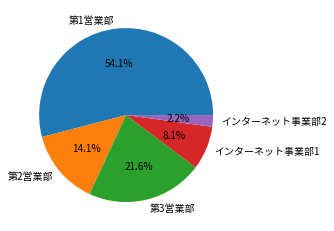

In [3]:
# sns.set(font="Meiryo")

# データ定義 
sales_dep = pd.DataFrame({
    "label": ["第1営業部", "第2営業部", "第3営業部",
              "インターネット事業部1", "インターネット事業部2"],
    "value": [500, 130, 200, 75, 20]})

plt.pie(sales_dep["value"], labels=sales_dep["label"],
        autopct="%1.1f%%")
plt.show()

大きい順に並べて時計の12時の位置から始まる円グラフにする

plt.pie関数の引数startangleに90を与えると12時の位置からスタートする

引数counterlockにFalseを与えることで、描画方向を時計回りにできる

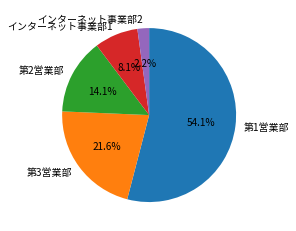

In [4]:
# sns.set(font="Meiryo") 

# データ定義 
sales_dep = pd.DataFrame({
    "label": ["第1営業部", "第2営業部", "第3営業部",
              "インターネット事業部1", "インターネット事業部2"],
    "value": [500, 130, 200, 75, 20]})

# ソート（今回は最初からソート済み） 
sales_dep = sales_dep.sort_values("value", ascending=False) 
plt.pie(sales_dep["value"], labels=sales_dep["label"],
        autopct="%1.1f%%", startangle=90, counterclock=False) 
plt.show()

強調したい扇形だけ色を変更

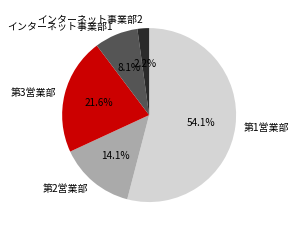

In [5]:
# sns.set(font="Meiryo") 

# データ定義 
sales_dep = pd.DataFrame({
    "label": ["第1営業部", "第2営業部", "第3営業部",
              "インターネット事業部1", "インターネット事業部2"],
    "value": [500, 130, 200, 75, 20]})

# 強調したい扇形のラベル 
point_label = "第3営業部" 
# 強調色 
point_color = "#CC0000" 
# 特定のラベルに対する色指定を変更する
palette = sns.color_palette("binary", len(sales_dep)) 
for i in sales_dep[sales_dep.label == point_label].index.values:
    palette[i] = point_color 

plt.pie(sales_dep["value"], labels=sales_dep["label"],
        autopct="%1.1f%%", startangle=90, counterclock=False,
        colors=palette)
plt.show()

plotlyによる円グラフ

In [6]:
sales_dep = pd.DataFrame({
    "label": ["第1営業部", "第2営業部", "第3営業部", 
              "インターネット事業部1", "インターネット事業部2"],
    "value": [500, 320, 130, 75, 20]})
fig = go.Figure(data=[go.Pie(labels=sales_dep["label"],
                             values=sales_dep["value"])]) 
fig.show()

## ドーナツグラフ
円グラフよりも見やすい

中心の大きさは引数holeに値を指定する

In [7]:
# データ 
sales_dep = pd.DataFrame({
    "label": ["第1営業部", "第2営業部", "第3営業部",
              "インターネット事業部1", "インターネット事業部2"],
    "value": [500, 320, 130, 75, 20]}) 

# Pieグラフ部分 
fig = go.Figure(data=[go.Pie(labels=sales_dep["label"],
                             values=sales_dep["value"],
                             hole=0.5)]) 
                              
# グラフタイトルとドーナツ部分の文字列 
fig.update_layout(title_text="部署別売上",
                  annotations=[{
                                "text": "売上構成",
                                "x": 0.5,
                                "y": 0.5,
                                "font_size": 20,
                                "showarrow": False}]) 
# 表示 
fig.show()

## 折れ線グラフ
時系列の変化を表現する際に用いられる

In [8]:
# データの読み込み
# 引数parse_datesに日時を表すdatetime形式として読み込みたいカラム名のリストを渡す
weather = pd.read_csv("weather_sample.csv", header=0, parse_dates=["年月"]) 
weather.head()

年月  東京-平均気温(℃)  東京-降水量の合計(mm)  東京-日照時間(時間)  大阪-平均気温(℃)  \
0 2015-01-01         5.8           92.5        182.0         6.1   
1 2015-02-01         5.7           62.0        166.9         6.9   
2 2015-03-01        10.3           94.0        194.2        10.2   
3 2015-04-01        14.5          129.0        149.5        15.9   
4 2015-05-01        21.1           88.0        240.6        21.5   

   大阪-降水量の合計(mm)  大阪-日照時間(時間)  那覇-平均気温(℃)  那覇-降水量の合計(mm)  那覇-日照時間(時間)  \
0           93.0        123.3        16.6           22.0         90.7   
1           25.5        136.8        16.8           47.0        114.1   
2          174.5        175.4        19.0           95.5        126.5   
3          107.0        152.1        22.2          100.0        118.9   
4          104.0        249.3        24.9          197.5        144.2   

   函館-平均気温(℃)  函館-降水量の合計(mm)  函館-日照時間(時間)  
0        -0.9           43.0        108.2  
1         0.1           52.5        129.4  
2         4.3          100.0        160.0  
3         8.3          133.5        227.5  
4        13.2           74.5        251.4

東京の平均気温を時系列で表示する

横軸の文字列が長いので、plt.xticks(rotation=90)で縦にしている

(array([16436., 16617., 16801., 16983., 17167., 17348., 17532., 17713.,
        17897.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

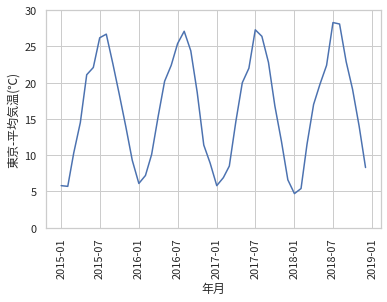

In [14]:
sns.set(style="whitegrid", font="Noto Sans CJK JP")

# デフォルトでは軸の最小が0にならないためy軸を指定する
plt.ylim([0, 30])

sns.lineplot(data=weather, x="年月", y="東京-平均気温(℃)")

# 年月を90度回転させて縦表示にして見えるようにする
plt.xticks(rotation=90)

複数の折れ線グラフを一つのグラフ内に描画

In [16]:
# データの読み込み
# index_colに0を指定することで日付データである年月カラムをインデックスにする
weather_index = pd.read_csv("weather_sample.csv", header=0,
                             parse_dates=["年月"], index_col=0) 
tmp_ave = weather_index[["東京-平均気温(℃)", "大阪-平均気温(℃)",
                         "那覇-平均気温(℃)", "函館-平均気温(℃)"]] 
tmp_ave.head()

東京-平均気温(℃)  大阪-平均気温(℃)  那覇-平均気温(℃)  函館-平均気温(℃)
年月                                                        
2015-01-01         5.8         6.1        16.6        -0.9
2015-02-01         5.7         6.9        16.8         0.1
2015-03-01        10.3        10.2        19.0         4.3
2015-04-01        14.5        15.9        22.2         8.3
2015-05-01        21.1        21.5        24.9        13.2

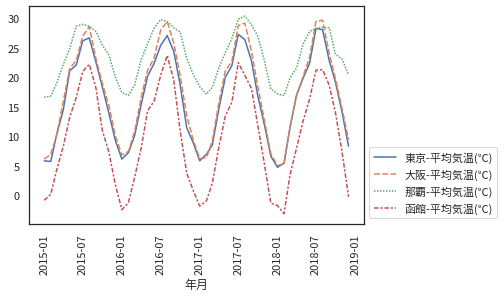

In [17]:
# 折れ線グラフを描画 最大で6つまで
sns.set(style="white", font="Noto Sans CJK JP")
ax = sns.lineplot(data=tmp_ave)

# ラベルと凡例を適正にする
plt.xticks(rotation=90)
ax.legend(loc="lower left", bbox_to_anchor=(1, 0))

複数の折れ線グラフの線の種類を同じにする

データの持ち方を変えてhueを指定する

          年月    category  value
0 2015-01-01  東京-平均気温(℃)    5.8
1 2015-01-01  大阪-平均気温(℃)    6.1
2 2015-01-01  那覇-平均気温(℃)   16.6
3 2015-01-01  函館-平均気温(℃)   -0.9
4 2015-02-01  東京-平均気温(℃)    5.7


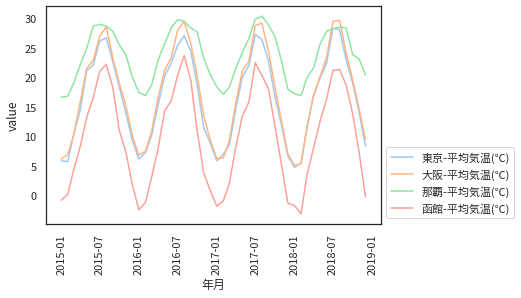

In [22]:
# データの整形
tmp_stack = tmp_ave.stack().rename_axis(["年月", "category"]).reset_index().rename(columns={0: "value"}) 
print(tmp_stack.head())

# 折れ線グラフを描画
sns.set(style="white", font="Noto Sans CJK JP") 
ax = sns.lineplot(data=tmp_stack, x="年月", y="value", hue="category",
                  palette="pastel") 
# ラベルと凡例を適正にする 
plt.xticks(rotation=90) 
ax.legend(loc="lower left", bbox_to_anchor=(1, 0))

折れ線グラフのうち一つを強調

          年月    category  value
0 2015-01-01  東京-平均気温(℃)    5.8
1 2015-01-01  大阪-平均気温(℃)    6.1
2 2015-01-01  那覇-平均気温(℃)   16.6
3 2015-01-01  函館-平均気温(℃)   -0.9
4 2015-02-01  東京-平均気温(℃)    5.7


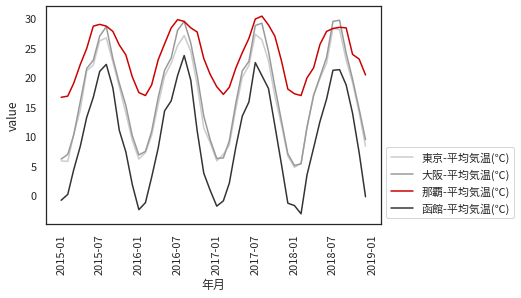

In [27]:
sns.set(style="white", font="Noto Sans CJK JP") 
tmp_stack = tmp_ave.stack().rename_axis(["年月", "category"]).reset_index().rename(columns={0: "value"}) 
print(tmp_stack.head())

# カテゴリ数を数える 
num_category = tmp_stack["category"].nunique() 
# 色の設定 
point_color = "#CC0000"

# 変更したいカテゴリの番号 
point_number = 2

# 元になるパレットの作成 
palette = sns.color_palette("gray_r", num_category)

# パレットの一部の色を変更する 
palette[point_number] = point_color 

# 折れ線グラフを描画 
ax = sns.lineplot(data=tmp_stack, x="年月", y="value", hue="category",
                  palette=palette) 
# ラベルと凡例を適正にする 
plt.xticks(rotation=90) 
ax.legend(loc="lower left", bbox_to_anchor=(1, 0))


plotlyを利用した折れ線グラフの描画例

In [28]:
fig = px.line(weather, x="年月", y="東京-平均気温(℃)")
fig.show()

In [29]:
tmp_tokyo = go.Scatter(x=weather["年月"], y=weather["東京-平均気温(℃)"], 
                       mode="lines", name="東京") 
tmp_osaka = go.Scatter(x=weather["年月"], y=weather["大阪-平均気温(℃)"],
                       mode="lines", name="大阪")
tmp_naha = go.Scatter(x=weather["年月"], y=weather["那覇-平均気温(℃)"],
                      mode="lines", name="那覇")
tmp_hakodate = go.Scatter(x=weather["年月"], y=weather["函館-平均気温(℃)"],
                          mode="lines", name="函館") 
# レイアウトの指定 
layout = go.Layout(xaxis=dict(title="各都市の平均気温", type="date",
                              dtick="M1"), # dtick:'M1'で1ヶ月ごとにラベルを表示
                   yaxis=dict(title="気温"))
fig = go.Figure(data=[tmp_tokyo, tmp_osaka, tmp_naha, tmp_hakodate], 
                layout=layout)
fig.show()

## ヒートマップ
行列の形に並んでいる値の大小に応じて色を変化させる

クロス集計後のデータの可視化によく用いられる

In [32]:
# データ読み込みとデータ定義
cafe = pd.read_csv("cafe.csv", header=0, index_col=0)
cafe

1月   2月   3月   4月   5月   6月   7月   8月   9月  10月  11月  12月
商品                                                                  
ホットコーヒー   980  828  823  650  732  653  763  650  791  732  758  996
アイスコーヒー   314  269  419  596  669  672  840  944  903  555  865  318
ホットティー    670  678  500  418  469  471  320  380  420  390  606  558
アイスティー    280  320  430  450  550  580  628  734  494  304  473  280
クッキー      311  332  200  403  350  369  219  328  316  379  434  366
アイスクリーム   150  128  200  284  319  320  650  559  500  265  412  152
プレーンドーナツ  205  278  249  424  372  371  426  269  200  297  427  311
チョコドーナツ   242  296  387  358  335  407  447  449  163  229  354  301
サンドイッチ    124  174  147  184  160  187  149  195  145  156  126  200

<AxesSubplot:ylabel='商品'>

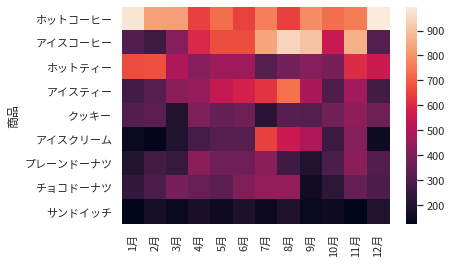

In [33]:
sns.heatmap(cafe)

隣接している行列との境界を明確にした方が分かりやすい場合、引数linewidthsで線の太さを指定

値が明確に知りたい場合、引数annotにTrueを指定

<AxesSubplot:ylabel='商品'>

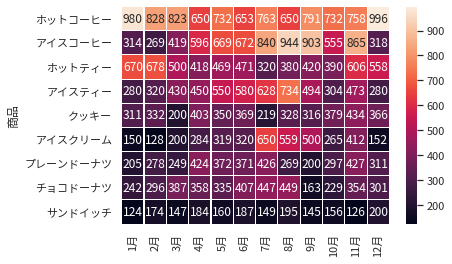

In [34]:
sns.heatmap(cafe, linewidths=.1, annot=True, fmt="d")

カラーマップも指定できる

<AxesSubplot:ylabel='商品'>

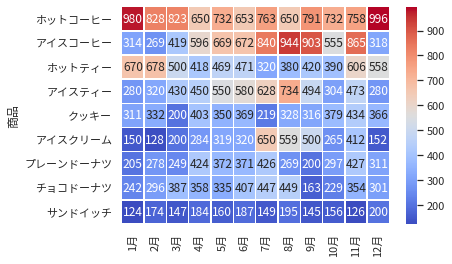

In [36]:
sns.heatmap(cafe, linewidths=.5, cmap="coolwarm", fmt="d", annot=True)

## ウォーターフォールチャート
二つの時点間の値の推移の要因とその大きさを表現する際に用いられる

例）企業の財務状況の変化など

In [38]:
fig = go.Figure(go.Waterfall(    
    # 絶対値か差分を指定する    
    measure=["absolute", "relative", "relative", "relative", "relative",
             "total"],
    # 項目を定義    
    x=["前月末残", "バイト代", "給料", "変動費", "固定費", "今月末残"],    
    #ラベルの項目を定義
    textposition = "outside",
    text=["30", "+10", "+50", "-32", "-10", "48"],
    # 数値の定義
    y=[30, 10, 50, -32, -10, 0],
    connector={"line": {"color": "rgb(0, 0, 0)"}}))

fig.update_layout(title="私の口座の動き",
                  showlegend=True )
fig.show()

## ツリーマップ
面積でデータの大小関係を表現する際に用いられる

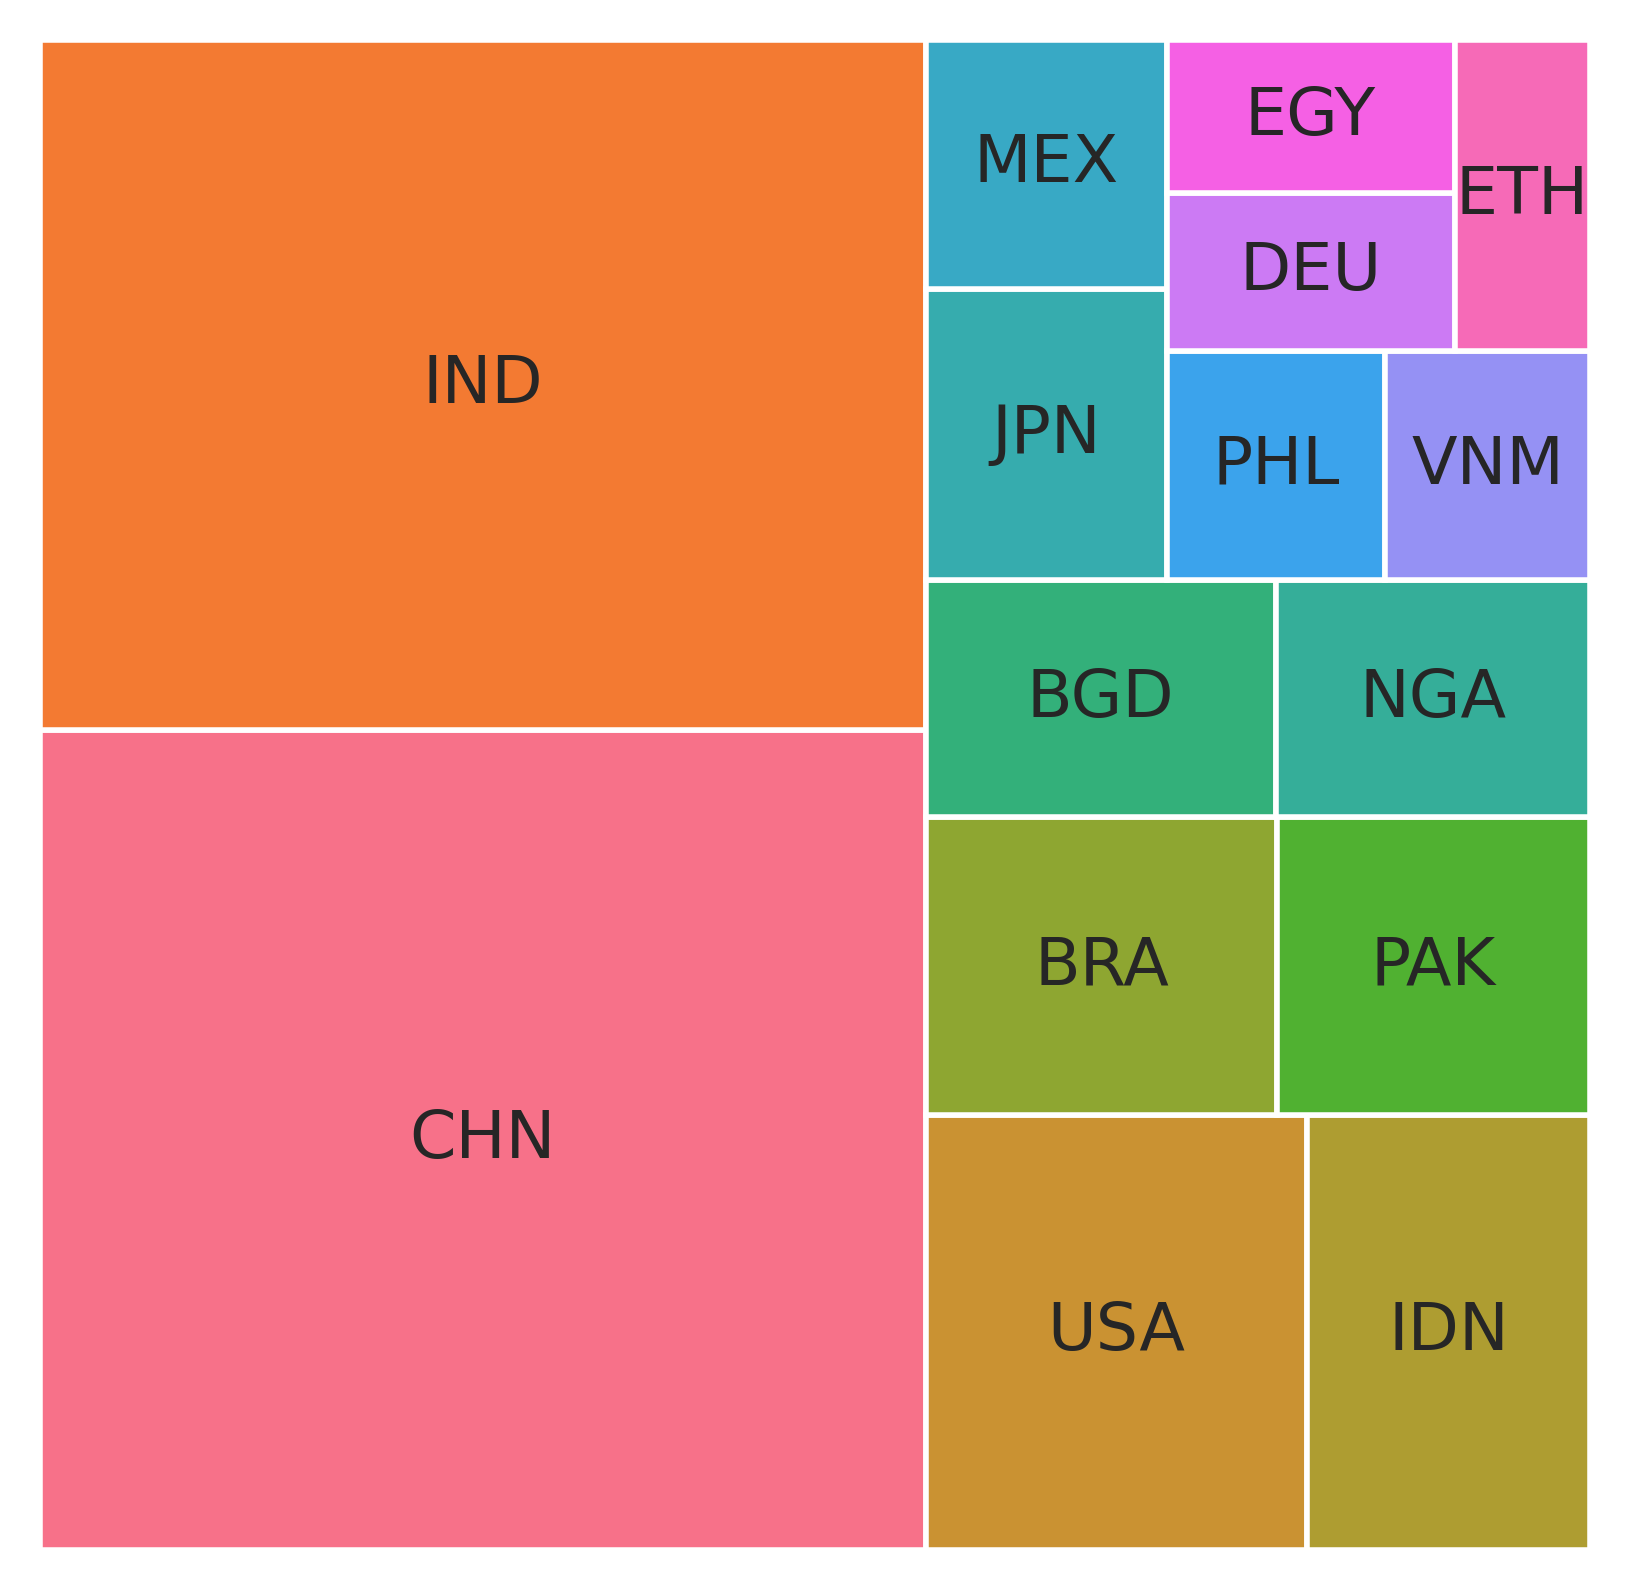

In [40]:
# サイズ調整
sns.set(rc={"figure.figsize": (5, 5),
            "figure.dpi": 400})

# plotlyに含まれる2007年の人口の情報を取得
pop_df = px.data.gapminder().query("year == 2007")

# 人口により降順ソート
pop_df = pop_df.sort_values("pop", ascending=False)

# 上位15件のみを取得
pop_df = pop_df.head(15)

# 人口
pop = list(pop_df["pop"])

# 国コード
code = list(pop_df["iso_alpha"])

# ツリーマップを描画
squarify.plot(pop, label=code, 
              color=sns.color_palette("husl", len(pop)))

# 軸ラベルオフ
plt.axis("off")
plt.show()

## サンバースチャート
割合を表現する際に表現

In [41]:
# データ定義
org = [
        {"name": "全社", "parent": "", "num": 50},
        {"name": "人事・総務部", "parent": "全社", "num": 10},
        {"name": "営業部", "parent": "全社", "num": 20},
        {"name": "第1営業室", "parent": "営業部", "num": 15},
        {"name": "第2営業室", "parent": "営業部", "num": 5},
        {"name": "開発部", "parent": "全社", "num": 20},
        {"name": "第1開発室", "parent": "開発部", "num": 10},
        {"name": "第2開発室", "parent": "開発部", "num": 7},
        {"name": "相談窓口", "parent": "開発部", "num": 3},
    ]

# グラフ定義
trace = go.Sunburst(labels=[record["name"] for record in org],
                    parents=[record["parent"] for record in org],
                    values=[record["num"] for record in org],
                    branchvalues="total",
                    outsidetextfont={"size": 30, "color": "#82A9DA"},
)

# レイアウト定義
layout = go.Layout(margin=go.layout.Margin(t=0, l=0, r=0, b=0))

# 描画
plotly.offline.iplot(go.Figure([trace], layout))

## レーダーチャート
順序尺度を複数持つデータを表現する際に用いられる

In [42]:
# データ定義
data = [
    {"label": "品質", "value": 5},
    {"label": "価格", "value": 4},
    {"label": "配達", "value": 2.7},
    {"label": "カスタマーサービス", "value": 3.4},
    {"label": "サイトの使いやすさ", "value": 4.3},
    {"label": "写真と実物の一致度", "value": 3.5},
]

df = pd.DataFrame({
    "label": [record["label"] for record in data],
    "value": [record["value"] for record in data],
})

print(df)

# グラフ定義
fig = px.line_polar(df, r="value", theta="label", line_close=True)

# レイアウト定義
fig.update_traces(fill="toself")

# 描画
fig.show()

       label  value
0         品質    5.0
1         価格    4.0
2         配達    2.7
3  カスタマーサービス    3.4
4  サイトの使いやすさ    4.3
5  写真と実物の一致度    3.5


複数のレーダーチャートを重ねて描画

同一の指標について比較できるようになる

In [44]:
# データ定義 
data = [
    {
        "氏名": "顧客1",
        "品質": 5,
        "価格": 4,
        "配達": 2.7,
        "カスタマーサービス": 3.4,
        "サイトの使いやすさ": 4.3,
        "写真と実物の一致度": 3.5
    },
    {
        "氏名": "顧客2",
        "品質": 4,
        "価格": 3,
        "配達": 4.5,
        "カスタマーサービス": 4.5,
        "サイトの使いやすさ": 1,
        "写真と実物の一致度": 4.5
    }
]

# データフレーム化 
df = pd.DataFrame(data).set_index("氏名") 
# データフレームを整形
df = df.stack().rename_axis(["氏名", "label"]).reset_index().rename(columns={0: "value"}) 

fig = px.line_polar(df, r="value", theta="label", color="氏名", line_close=True) 
fig.show()